In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [2]:
key = 'fdad97641575b685a33767af5884211d3629822f'


In [3]:
df = pdr.get_data_tiingo("MSFT", api_key=key)

In [4]:
df.to_csv('MSFT.csv')

In [6]:
df = pd.read_csv('MSFT.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2016-11-03 00:00:00+00:00,59.21,59.64,59.11,59.53,21600427,54.789170,55.187065,54.696637,55.085278,21600427,0.0,1.0
1,MSFT,2016-11-04 00:00:00+00:00,58.71,59.28,58.52,58.65,28697016,54.326502,54.853944,54.150688,54.270982,28697016,0.0,1.0
2,MSFT,2016-11-07 00:00:00+00:00,60.42,60.52,59.78,59.78,31664798,55.908827,56.001361,55.316612,55.316612,31664798,0.0,1.0
3,MSFT,2016-11-08 00:00:00+00:00,60.47,60.78,60.15,60.55,22935355,55.955094,56.241948,55.658986,56.029121,22935355,0.0,1.0
4,MSFT,2016-11-09 00:00:00+00:00,60.17,60.59,59.20,60.00,49632479,55.677493,56.066134,54.779917,55.520186,49632479,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,MSFT,2021-10-27 00:00:00+00:00,323.17,326.0973,316.0000,316.000,52588690,323.17,326.0973,316.0000,316.000,52588690,0.0,1.0
1254,MSFT,2021-10-28 00:00:00+00:00,324.35,324.8700,321.3601,324.325,26297943,324.35,324.8700,321.3601,324.325,26297943,0.0,1.0
1255,MSFT,2021-10-29 00:00:00+00:00,331.62,332.0000,323.9000,324.130,34765982,331.62,332.0000,323.9000,324.130,34765982,0.0,1.0
1256,MSFT,2021-11-01 00:00:00+00:00,329.37,331.4900,326.3700,331.355,26840400,329.37,331.4900,326.3700,331.355,26840400,0.0,1.0
1257,MSFT,2021-11-02 00:00:00+00:00,333.13,333.4500,330.0000,330.310,25719044,333.13,333.4500,330.0000,330.310,25719044,0.0,1.0


In [10]:
df1=df.reset_index()['close']

In [11]:
df1.shape

(1258,)

In [12]:
df1.head()

0    59.21
1    58.71
2    60.42
3    60.47
4    60.17
Name: close, dtype: float64

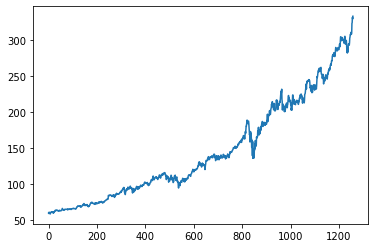

In [13]:
plt.plot(df1)

In [11]:
### LSTM are sensitve to scale of data. so we aply MinMax scaler


In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.00396349],
       [0.00214538],
       [0.00836333],
       ...,
       [0.99450929],
       [0.98632777],
       [1.        ]])

In [16]:
 ##spliting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train)

[[0.00396349 0.00214538 0.00836333 ... 0.0253809  0.02607178 0.0267263 ]
 [0.00214538 0.00836333 0.00854514 ... 0.02607178 0.0267263  0.027599  ]
 [0.00836333 0.00854514 0.00745427 ... 0.0267263  0.027599   0.02814443]
 ...
 [0.29446202 0.28871677 0.2834806  ... 0.37874986 0.39031308 0.39969456]
 [0.28871677 0.2834806  0.28362605 ... 0.39031308 0.39969456 0.41693029]
 [0.2834806  0.28362605 0.28871677 ... 0.39969456 0.41693029 0.4076579 ]]


In [20]:
print(X_train.shape, y_train.shape)

(716, 100) (716,)


In [21]:
#reshape input to be [samples, time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [22]:
print(X_train.shape)

(716, 100, 1)


In [23]:
ytest.shape

(340,)

In [24]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train, validation_data=(X_test,ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 583ms/step - loss: 0.0094 - val_loss: 0.0820
Epoch 2/100
12/12 [==============================] - 4s 312ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 3/100
12/12 [==============================] - 4s 309ms/step - loss: 4.1226e-04 - val_loss: 0.0051
Epoch 4/100
12/12 [==============================] - 4s 331ms/step - loss: 2.7942e-04 - val_loss: 0.0015
Epoch 5/100
12/12 [==============================] - 4s 346ms/step - loss: 1.5856e-04 - val_loss: 0.0021
Epoch 6/100
12/12 [==============================] - 4s 337ms/step - loss: 1.1897e-04 - val_loss: 0.0014
Epoch 7/100
12/12 [==============================] - 4s 326ms/step - loss: 1.1441e-04 - val_loss: 0.0012
Epoch 8/100
12/12 [==============================] - 4s 338ms/step - loss: 1.1461e-04 - val_loss: 0.0013
Epoch 9/100
12/12 [==============================] - 4s 296ms/step - loss: 1.1348e-04 - val_loss: 0.0012
Epoch 10/100
12/12 [==============================] - 4s 338ms/

Epoch 78/100
12/12 [==============================] - 3s 218ms/step - loss: 9.8198e-05 - val_loss: 8.6191e-04
Epoch 79/100
12/12 [==============================] - 3s 217ms/step - loss: 9.3071e-05 - val_loss: 7.7828e-04
Epoch 80/100
12/12 [==============================] - 3s 217ms/step - loss: 8.5113e-05 - val_loss: 9.3060e-04
Epoch 81/100
12/12 [==============================] - 3s 216ms/step - loss: 8.5176e-05 - val_loss: 0.0014
Epoch 82/100
12/12 [==============================] - 3s 215ms/step - loss: 9.2656e-05 - val_loss: 0.0011
Epoch 83/100
12/12 [==============================] - 3s 213ms/step - loss: 9.8101e-05 - val_loss: 0.0015
Epoch 84/100
12/12 [==============================] - 3s 211ms/step - loss: 1.0396e-04 - val_loss: 6.8951e-04
Epoch 85/100
12/12 [==============================] - 3s 217ms/step - loss: 8.8293e-05 - val_loss: 7.3401e-04
Epoch 86/100
12/12 [==============================] - 3s 217ms/step - loss: 1.0561e-04 - val_loss: 8.6227e-04
Epoch 87/100
12/12 [==

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.3.0'

In [30]:
### Lets do prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [31]:
###Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

110.76071104303674

In [33]:
### Test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

258.63685297014325

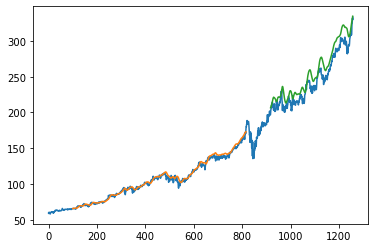

In [39]:
### Plotting
# Shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
print(len(test_data))

#to predict next day must take previous 100 days of data,
print(440-100)

441
340


In [40]:
x_input = test_data[340:].reshape(-1,1)
x_input.shape

(101, 1)

In [41]:
temp_input = list(x_input)

list1 = [list(x) for x in temp_input]

t_inp=[]
for x in list1:
    for item in x:
        t_inp.append(item)

In [42]:
#returns the list below from the list of list above, i.e., we would call flatten(list1) above
def flatten(t):
    return [item for sublist in t for item in sublist]

In [43]:
t_inp

[0.7264099487291371,
 0.7336824115486709,
 0.7281189774917276,
 0.724555470710156,
 0.7373550052725355,
 0.7320097451001781,
 0.7436456856114324,
 0.754118032071561,
 0.7532635176902658,
 0.758408785135086,
 0.7523362786807752,
 0.7657903348969131,
 0.775535435075088,
 0.7737173193702047,
 0.7762626813570417,
 0.7982618813861313,
 0.7982982437002291,
 0.8065524890003999,
 0.797425548161885,
 0.7993163884949637,
 0.7970619250209083,
 0.8103705319806553,
 0.8159339660375986,
 0.8105523435511435,
 0.8095341987564089,
 0.7959346932838804,
 0.8043343878404421,
 0.8118977491727573,
 0.8291334860550525,
 0.8419693829315298,
 0.8397149194574742,
 0.8305879786189594,
 0.829424384567834,
 0.8304425293625686,
 0.8246609214210392,
 0.8243336605941602,
 0.8326969928366241,
 0.8304788916766663,
 0.8414239482200647,
 0.8412057743354786,
 0.837096832842442,
 0.8302243554779827,
 0.8320788334969638,
 0.8424784553288971,
 0.8535325988145885,
 0.8598960037816807,
 0.8543689320388348,
 0.8458237882258828,

In [44]:
#demonstrate prediction for next 10 dats
from numpy import array

lst_output = []
n_steps = 100
i = 0

while(i<30):
    if(len(t_inp)>100):
        x_input = np.array(t_inp[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        t_inp.extend(yhat[0].tolist())
        t_inp=t_inp[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        t_inp.extend(yhat[0].tolist())
        print(len(t_inp))
        lst_output.extend(yhat.tolist())
        i=i+1
        

print(lst_output)

0 day input [0.73368241 0.72811898 0.72455547 0.73735501 0.73200975 0.74364569
 0.75411803 0.75326352 0.75840879 0.75233628 0.76579033 0.77553544
 0.77371732 0.77626268 0.79826188 0.79829824 0.80655249 0.79742555
 0.79931639 0.79706193 0.81037053 0.81593397 0.81055234 0.8095342
 0.79593469 0.80433439 0.81189775 0.82913349 0.84196938 0.83971492
 0.83058798 0.82942438 0.83044253 0.82466092 0.82433366 0.83269699
 0.83047889 0.84142395 0.84120577 0.83709683 0.83022436 0.83207883
 0.84247846 0.8535326  0.859896   0.85436893 0.84582379 0.86778663
 0.89538562 0.89644013 0.88905858 0.88684048 0.87622268 0.87851351
 0.89258572 0.88636777 0.88618596 0.88371332 0.88367696 0.88018618
 0.88029526 0.86953202 0.86393222 0.8685866  0.87876804 0.89705829
 0.89851278 0.87905894 0.85880513 0.86062325 0.8743682  0.87793171
 0.8771681  0.85833242 0.81960656 0.82135195 0.81378859 0.83989673
 0.8181157  0.83866041 0.85447802 0.86080506 0.86080506 0.8585506
 0.85364169 0.86611396 0.88953129 0.89484019 0.90603

7 day output [[1.1338938]]
8 day input [0.75840879 0.75233628 0.76579033 0.77553544 0.77371732 0.77626268
 0.79826188 0.79829824 0.80655249 0.79742555 0.79931639 0.79706193
 0.81037053 0.81593397 0.81055234 0.8095342  0.79593469 0.80433439
 0.81189775 0.82913349 0.84196938 0.83971492 0.83058798 0.82942438
 0.83044253 0.82466092 0.82433366 0.83269699 0.83047889 0.84142395
 0.84120577 0.83709683 0.83022436 0.83207883 0.84247846 0.8535326
 0.859896   0.85436893 0.84582379 0.86778663 0.89538562 0.89644013
 0.88905858 0.88684048 0.87622268 0.87851351 0.89258572 0.88636777
 0.88618596 0.88371332 0.88367696 0.88018618 0.88029526 0.86953202
 0.86393222 0.8685866  0.87876804 0.89705829 0.89851278 0.87905894
 0.85880513 0.86062325 0.8743682  0.87793171 0.8771681  0.85833242
 0.81960656 0.82135195 0.81378859 0.83989673 0.8181157  0.83866041
 0.85447802 0.86080506 0.86080506 0.8585506  0.85364169 0.86611396
 0.88953129 0.89484019 0.90603978 0.90945784 0.90647613 0.9186575
 0.91283953 0.90909421 0.

17 day output [[1.3012781]]
18 day input [0.79931639 0.79706193 0.81037053 0.81593397 0.81055234 0.8095342
 0.79593469 0.80433439 0.81189775 0.82913349 0.84196938 0.83971492
 0.83058798 0.82942438 0.83044253 0.82466092 0.82433366 0.83269699
 0.83047889 0.84142395 0.84120577 0.83709683 0.83022436 0.83207883
 0.84247846 0.8535326  0.859896   0.85436893 0.84582379 0.86778663
 0.89538562 0.89644013 0.88905858 0.88684048 0.87622268 0.87851351
 0.89258572 0.88636777 0.88618596 0.88371332 0.88367696 0.88018618
 0.88029526 0.86953202 0.86393222 0.8685866  0.87876804 0.89705829
 0.89851278 0.87905894 0.85880513 0.86062325 0.8743682  0.87793171
 0.8771681  0.85833242 0.81960656 0.82135195 0.81378859 0.83989673
 0.8181157  0.83866041 0.85447802 0.86080506 0.86080506 0.8585506
 0.85364169 0.86611396 0.88953129 0.89484019 0.90603978 0.90945784
 0.90647613 0.9186575  0.91283953 0.90909421 0.91629395 0.96378314
 0.96807389 0.99450929 0.98632777 1.         1.027637   1.04060447
 1.05463195 1.06951332 

27 day output [[1.4525305]]
28 day input [0.84196938 0.83971492 0.83058798 0.82942438 0.83044253 0.82466092
 0.82433366 0.83269699 0.83047889 0.84142395 0.84120577 0.83709683
 0.83022436 0.83207883 0.84247846 0.8535326  0.859896   0.85436893
 0.84582379 0.86778663 0.89538562 0.89644013 0.88905858 0.88684048
 0.87622268 0.87851351 0.89258572 0.88636777 0.88618596 0.88371332
 0.88367696 0.88018618 0.88029526 0.86953202 0.86393222 0.8685866
 0.87876804 0.89705829 0.89851278 0.87905894 0.85880513 0.86062325
 0.8743682  0.87793171 0.8771681  0.85833242 0.81960656 0.82135195
 0.81378859 0.83989673 0.8181157  0.83866041 0.85447802 0.86080506
 0.86080506 0.8585506  0.85364169 0.86611396 0.88953129 0.89484019
 0.90603978 0.90945784 0.90647613 0.9186575  0.91283953 0.90909421
 0.91629395 0.96378314 0.96807389 0.99450929 0.98632777 1.
 1.027637   1.04060447 1.05463195 1.06951332 1.08503962 1.10103118
 1.11734998 1.13389385 1.15058923 1.16738296 1.18423438 1.20111048
 1.21798074 1.23481727 1.25159

In [57]:
day_new = np.arange(1,102)
day_pred = np.arange(101,131)

In [58]:
len(df1)

1258

In [59]:
df3 = df1.tolist()
df3.extend(lst_output)

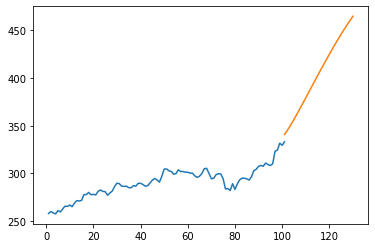

In [60]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

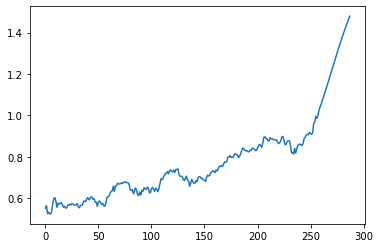

In [61]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])